In [1]:
import pm4py

### Read

In [2]:
log = pm4py.read_xes("3_modified.xes")

d:\Programs\Programming\Python\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [3]:
procfiler = log["concept:name"].str.startswith("Procfiler/")
gc = log["concept:name"].str.startswith("GC/")
print(f'Procfiler: {sum(procfiler)}, GC: {sum(gc)}')

Procfiler: 2035506, GC: 144667


In [4]:
log_min = log[procfiler & ~gc]
log_min

,concept:name,time:timestamp,ManagedThreadId,NativeThreadId,QpcStamp,case:concept:name,concept:instance,lifecycle:transition
0,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.093946+00:00,25452,25452,13371926562902,1,NaN,NaN
2,Procfiler/MethodStart_{Interop+Advapi32.EventA...,2025-01-10 20:01:47.094207+00:00,25452,25452,13371926565514,1,NaN,NaN
3,Procfiler/MethodEnd_{Interop+Advapi32.EventAct...,2025-01-10 20:01:47.094208+00:00,25452,25452,13371926565518,1,NaN,NaN
7,Procfiler/MethodStart_{Interop+Advapi32.EventA...,2025-01-10 20:01:47.094226+00:00,25452,25452,13371926565700,1,NaN,NaN
8,Procfiler/MethodEnd_{Interop+Advapi32.EventAct...,2025-01-10 20:01:47.094226+00:00,25452,25452,13371926565701,1,NaN,NaN
...,...,...,...,...,...,...,...,...
2341767,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...,2025-01-10 20:03:37.599533+00:00,18968,18968,13373031605845,12,NaN,NaN
2341770,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:03:37.599576+00:00,18968,18968,13373031606272,12,NaN,NaN
2341771,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...,2025-01-10 20:03:37.599580+00:00,18968,18968,13373031606318,12,NaN,NaN
2341772,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...,2025-01-10 20:03:37.599580+00:00,18968,18968,13373031606321,12,NaN,NaN


In [5]:
(~log_min["concept:instance"].isna()).sum(), (~log_min["lifecycle:transition"].isna()).sum()

(0, 0)

### Cluster

In [6]:
import sklearn.cluster
a = pm4py.cluster_log(
    log_min, sklearn.cluster.KMeans()
)
[ e for e in a ]

KeyboardInterrupt: 

### Variants

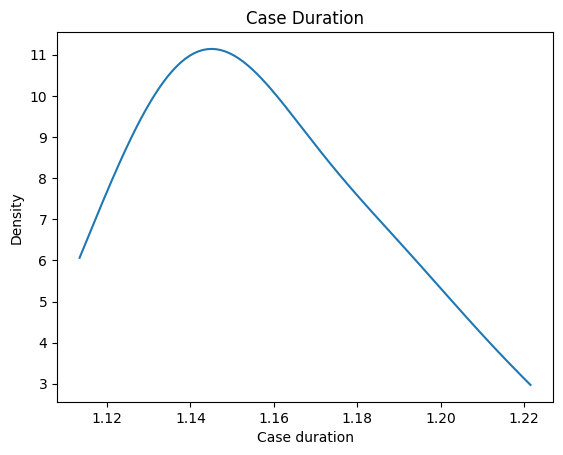

In [ ]:
pm4py.view_case_duration_graph(log_min)

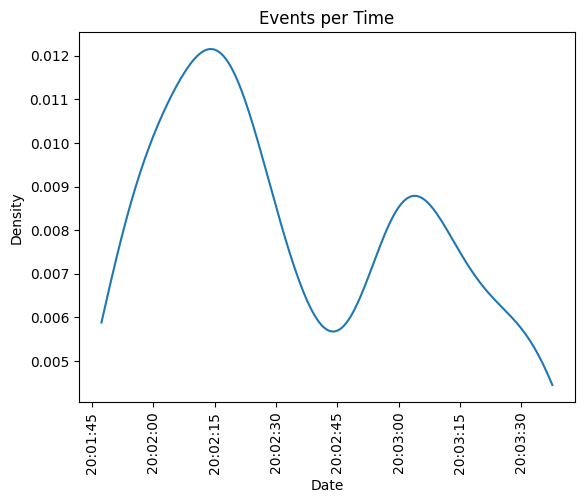

In [ ]:
pm4py.view_events_per_time_graph(log_min)

In [9]:
pm4py.get_frequent_trace_segments(log_min, min_occ = 60)

Counter()

### DFG

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_min)

a = list(dfg.values())
a.sort()
a[-100:]

d:\Programs\Programming\Python\lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


[2556,
 2595,
 2707,
 2707,
 2758,
 2761,
 2761,
 2761,
 2765,
 2907,
 3108,
 3205,
 3205,
 3205,
 3205,
 3205,
 3248,
 3248,
 3269,
 3315,
 3333,
 3333,
 3636,
 3648,
 3686,
 3686,
 3686,
 3686,
 3703,
 3787,
 3787,
 3801,
 3847,
 3847,
 4207,
 4375,
 4439,
 4688,
 4688,
 5032,
 5032,
 5032,
 5128,
 5340,
 5429,
 5625,
 5625,
 5625,
 5625,
 5625,
 5649,
 5649,
 6159,
 6392,
 6729,
 7224,
 7224,
 7248,
 7296,
 8779,
 8906,
 9137,
 10158,
 10213,
 10820,
 10881,
 11092,
 11092,
 11192,
 12749,
 14740,
 14740,
 14758,
 14758,
 14758,
 14758,
 14840,
 14840,
 14840,
 14840,
 16145,
 16220,
 16220,
 16220,
 16342,
 16923,
 18376,
 18376,
 18376,
 21943,
 24479,
 24479,
 34010,
 34010,
 34110,
 34110,
 42019,
 42019,
 49664,
 58589]

In [ ]:
threshold = 5000
filtered_dfg = {k: v for k, v in dfg.items() if v >= threshold}
len(filtered_dfg)

61

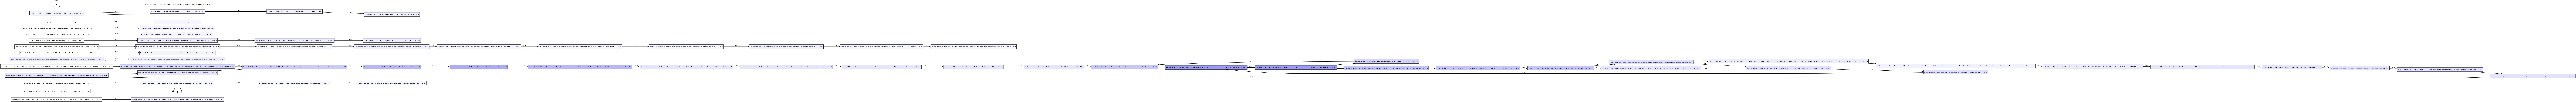

In [14]:
pm4py.view_dfg(filtered_dfg, start_activities, end_activities)

### Heuristic net

In [18]:
map = pm4py.discover_heuristics_net(log_min, min_act_count = 5000, min_dfg_occurrences = 2000)

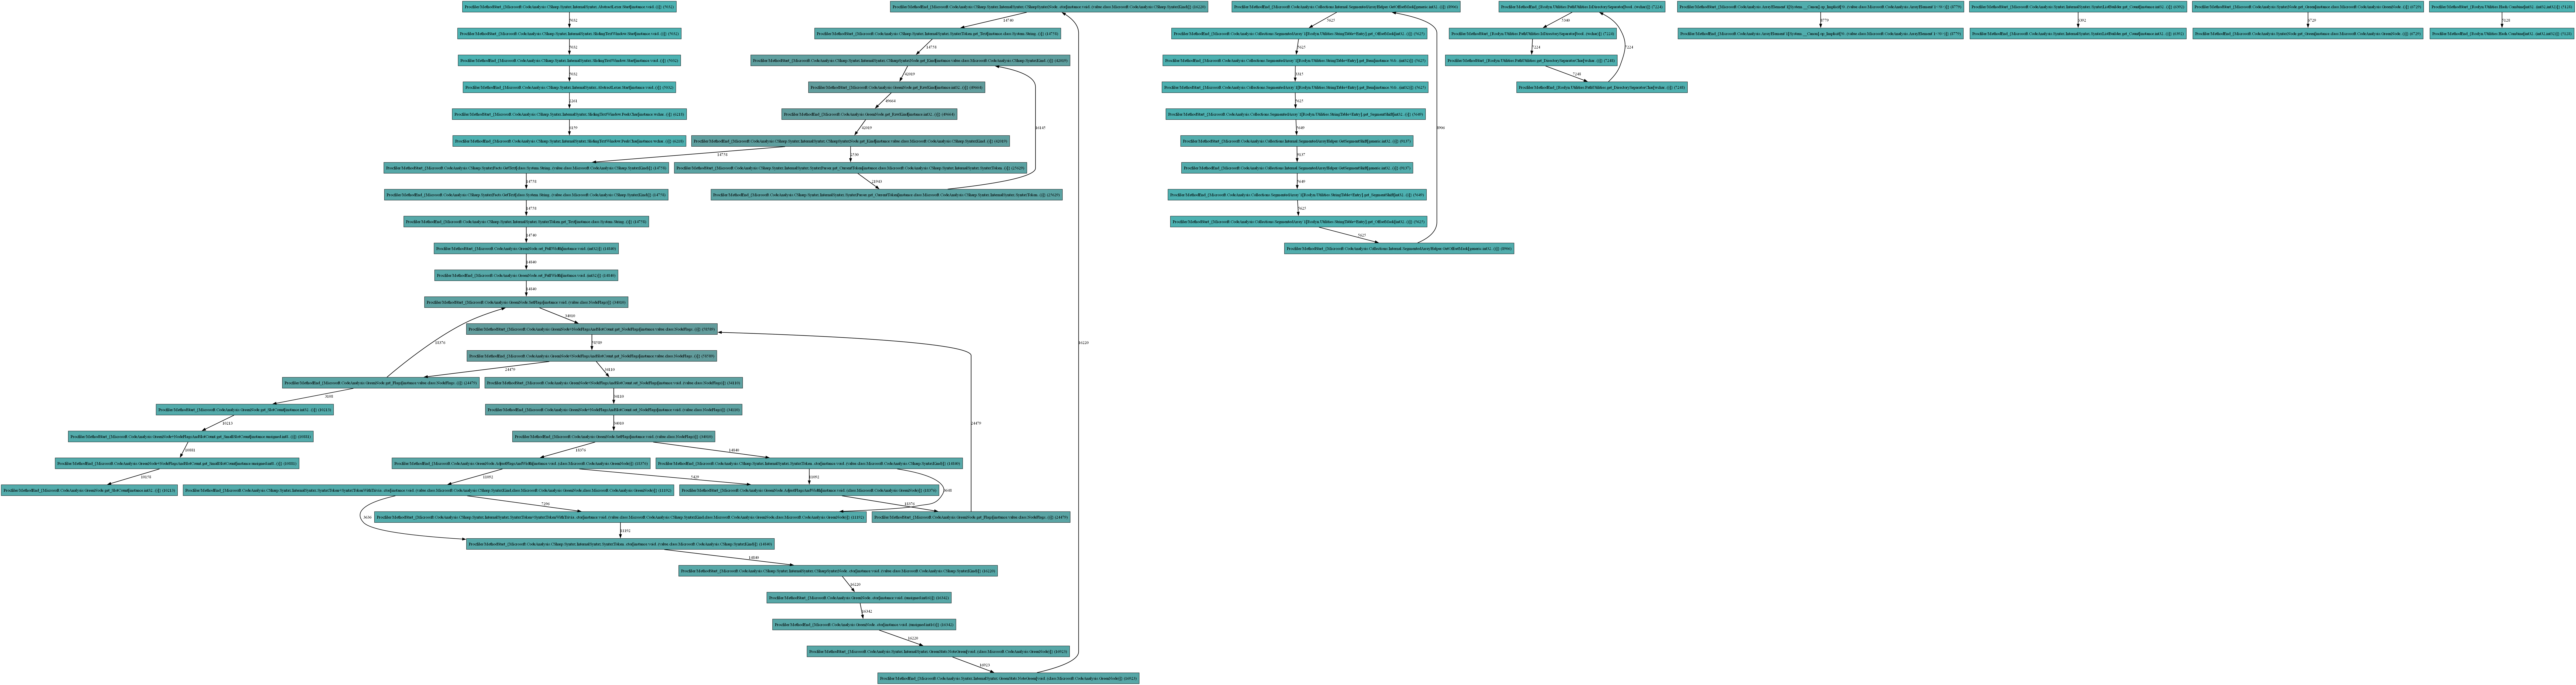

In [19]:
pm4py.view_heuristics_net(map)

### Petri net

In [ ]:
petrinet = pm4py.discover_petri_net_alpha(log_min)

In [ ]:
declare_model = pm4py.discover_declare(log_min, min_support_ratio = 0.9, min_confidence_ratio = 0.9)
declare_model

In [ ]:
pm4py.conformance_declare(log_min[:100], declare_model)

In [ ]:
pm4py.get_end_activities(log)

In [ ]:
log_min = log.groupby('case:concept:name')
log_min

In [ ]:
pm4py.petri_net

In [ ]:
log_min = log[~log["concept:instance"].isna()].groupby('case:concept:name').head(1000)
log_min

In [5]:
petri_net = pm4py.discover_process_tree_inductive(log_min, multi_processing = True, noise_threshold = 0.7)

petri_net

KeyboardInterrupt: 

In [ ]:
pm4py.view_petri_net(petri_net)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_min)

In [ ]:
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
map = pm4py.discover_heuristics_net(log_min)

In [ ]:
pm4py.view_heuristics_net(map)

In [ ]:
process_tree = pm4py.petri_net(log_min, multi_processing = True)

process_tree